## Supervised Machine Learning, Classification 

## Summary
The dataset for this project concerns about the german credit loan history. It describes various parameters that make it possible to characterize a loan request, as well as its final eligibility.<br>
In this case, the task will be to predict the Creditability of the loan request using the given data. Therefore, focusing will be given on the interpretability of the model and the accuracy of the prediction.<br>

The dataset has 1000 instances and 21 attributes.<br><br>
Let's take a more detailed look at the attributes:<br>

- 'Creditability' <- the label to be predicted
- 'Account Balance' 
- 'Duration of Credit (month)'
- 'Payment Status of Previous Credit' 
- 'Purpose' 
- 'Credit Amount'
- 'Value Savings/Stocks' 
- 'Length of current employment' 
- 'Instalment per cent' 
- 'Sex & Marital Status' 
- 'Guarantors' 
- 'Duration in Current address' 
- 'Most valuable available asset' 
- 'Age (years)'
- 'Concurrent Credits' 
- 'Type of apartment' 
- 'No of Credits at this Bank' 
- 'Occupation' 
- 'No of dependents' 
- 'Telephone' 
- 'Foreign Worker' 

<br>
Since the goal of this project is to predict the final eligibility of the loan request, the 'Creditability' column will be the label of the dataset.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, precision_score
from sklearn.metrics import recall_score, roc_auc_score, auc, precision_recall_fscore_support, f1_score
from imblearn.over_sampling import SMOTE

In [2]:
# Mute the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./german_credit.csv', sep=',')
data.shape

(1000, 21)

In [4]:
data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [6]:
# No null values
data.isnull().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

There are no null values and every feature is numerical (int64)

In [7]:
data.nunique()

Creditability                          2
Account Balance                        4
Duration of Credit (month)            33
Payment Status of Previous Credit      5
Purpose                               10
Credit Amount                        923
Value Savings/Stocks                   5
Length of current employment           5
Instalment per cent                    4
Sex & Marital Status                   4
Guarantors                             3
Duration in Current address            4
Most valuable available asset          4
Age (years)                           53
Concurrent Credits                     3
Type of apartment                      3
No of Credits at this Bank             4
Occupation                             4
No of dependents                       2
Telephone                              2
Foreign Worker                         2
dtype: int64

In [8]:
for col in data:
    print(col + ': ')
    print(data[col].unique())

Creditability: 
[1 0]
Account Balance: 
[1 2 4 3]
Duration of Credit (month): 
[18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
Payment Status of Previous Credit: 
[4 2 3 0 1]
Purpose: 
[ 2  0  9  3  1 10  5  4  6  8]
Credit Amount: 
[ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 10875  1344  1237  3077  2284  1567  2032  2745  1867
  2299   929  3399  2030  3275  1940  1602  1979  2022  3342  5866  2360
  1520  3651  2346  4454   666  1965  1995  2991  4221  1364  6361  4526
  3573  4455  2136  5954  3777   806  4712  7432  1851  1393  1412  1473
  1533  2012  3959   428  2366   763  3976  6260  1919  

<AxesSubplot:>

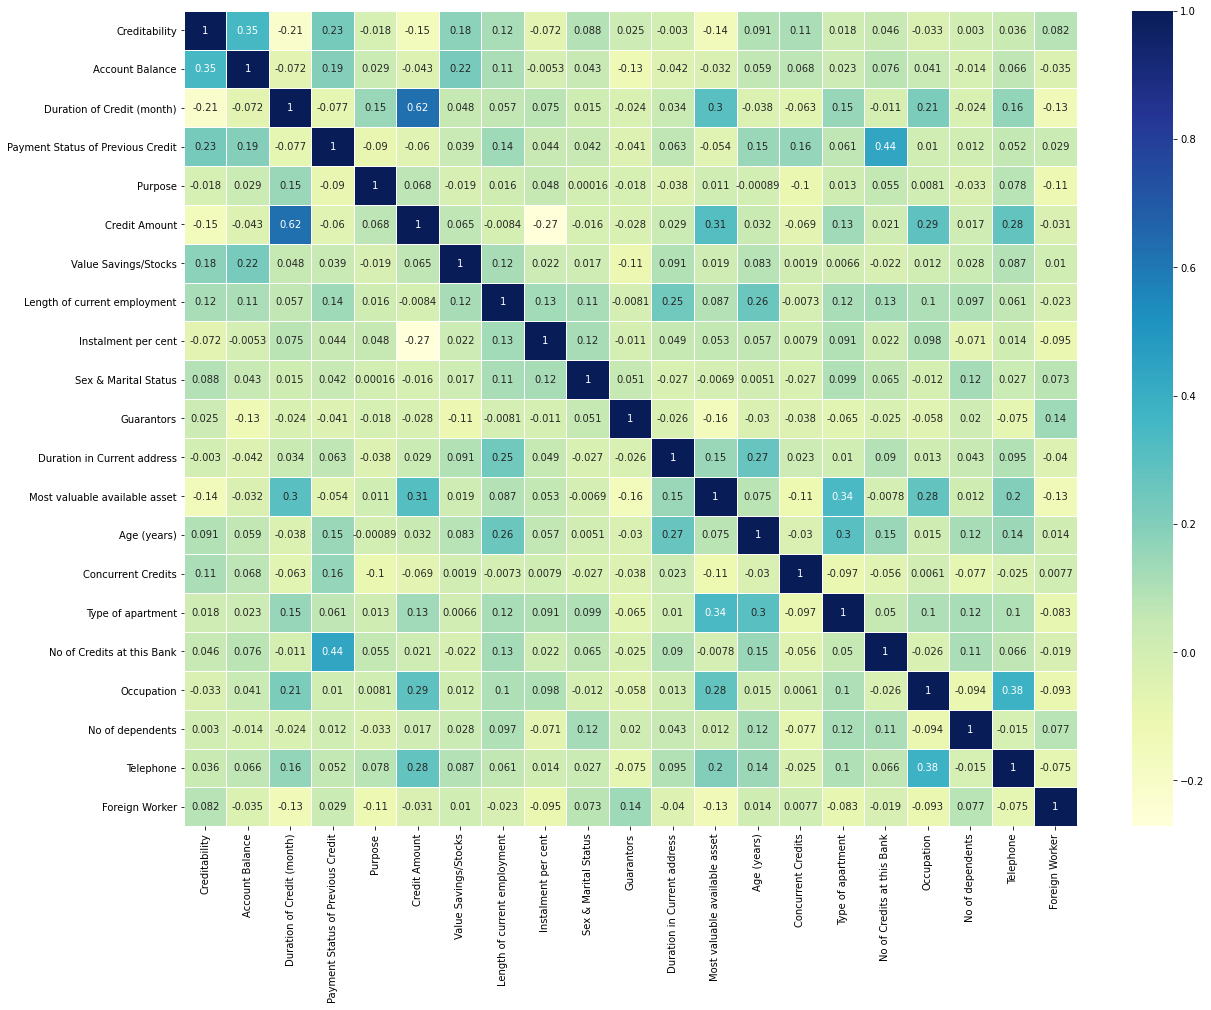

In [9]:
corr = data.corr(method='pearson')
fig = plt.subplots(figsize = (20, 15))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='YlGnBu',
            annot=True,
            linewidth=0.5)

The only remarkable linear correlation is between Credit Amount and Duration of the Credit (month)

In [10]:
print("min: " + str(data['Credit Amount'].min()) + " , max: " + str(data['Credit Amount'].max()))

min: 250 , max: 18424


<AxesSubplot:>

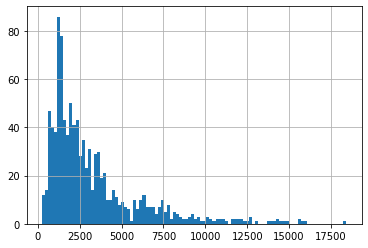

In [11]:
data['Credit Amount'].hist(bins = 100)

Since Credit Amount has a big number of unique value, it is best to discretize it in several bins.

In [12]:
asd = pd.cut( x = data['Credit Amount'], bins=[0,2500,5000,7500,10000,100000], labels = [0,1,2,3,4])

In [13]:
asd.unique()

[0, 1, 2, 3, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

<AxesSubplot:>

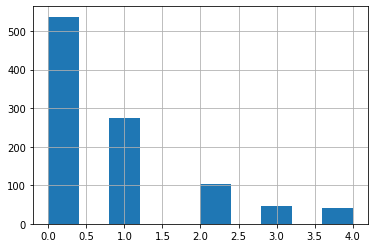

In [14]:
asd.hist(bins = 10)

In [15]:
data["Amount"] = asd

## Train-Test Split
In this phase, the dataset is splitted into two parts: one for the training and one for the test.

In [16]:
data['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

We have a case of unbalanced classes

<AxesSubplot:>

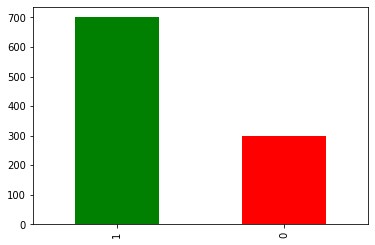

In [17]:
# Visualize the count for each class
from cProfile import label


data['Creditability'].value_counts().plot.bar(color=['green', 'red'])

In [18]:
x = data.drop(['Creditability'], axis = 1)
y = data.Creditability

# stratified on Creditability
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size = 0.25,stratify=data['Creditability'], random_state = 15)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 750 samples.
Testing set has 250 samples.


In [19]:
y_train.value_counts()/750

1    0.7
0    0.3
Name: Creditability, dtype: float64

In [20]:
y_test.value_counts()/250

1    0.7
0    0.3
Name: Creditability, dtype: float64

## Train Models
In this paragraph we will train various Machine Learning models: LogisticRegression,K Nearest Neighbors, Decision Tree, Random Forest.<br>
On each of these models will then be done the tuning of the hyperparameters, which will allow to find the best values that will be th input for the training of the best estimators.
At the end, the results will be compared using several metrics, like Accuracy, Precision, Recall, FScore and AUC.

In [21]:
list_metrics = []

### Logistic Regression

In [22]:
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
          "penalty": ['l2']}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'C': 1.623776739188721, 'penalty': 'l2', 'solver': 'newton-cg'}


In [23]:
lr_clf.fit(X_train, y_train)

preds = lr_clf.predict(X_test)

In [24]:
precision, recall, f_beta, support = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)

list_metrics.append(["Logistic Regression", accuracy, precision, recall, f_beta, auc])

print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {f_beta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.78
Precision is: 0.79
Recall is: 0.93
Fscore is: 0.92
AUC is: 0.67


Lets check the most important features

In [25]:
# Use permutation_importance to calculate permutation feature importances
feature_importances = permutation_importance(estimator=lr_clf, X = X_train, y = y_train, n_repeats=10,
                                random_state=123, n_jobs=-1)

In [26]:
def visualize_feature_importance(importance_array):
    # Sort the array based on mean value
    sorted_idx = importance_array.importances_mean.argsort()
    # Visualize the feature importances using boxplot
    fig, ax = plt.subplots()
    fig.set_figwidth(16)
    fig.set_figheight(10)
    fig.tight_layout()
    ax.boxplot(importance_array.importances[sorted_idx].T,
               vert=False, labels=X_train.columns[sorted_idx])
    ax.set_title("Permutation Importances (train set)")
    plt.show()

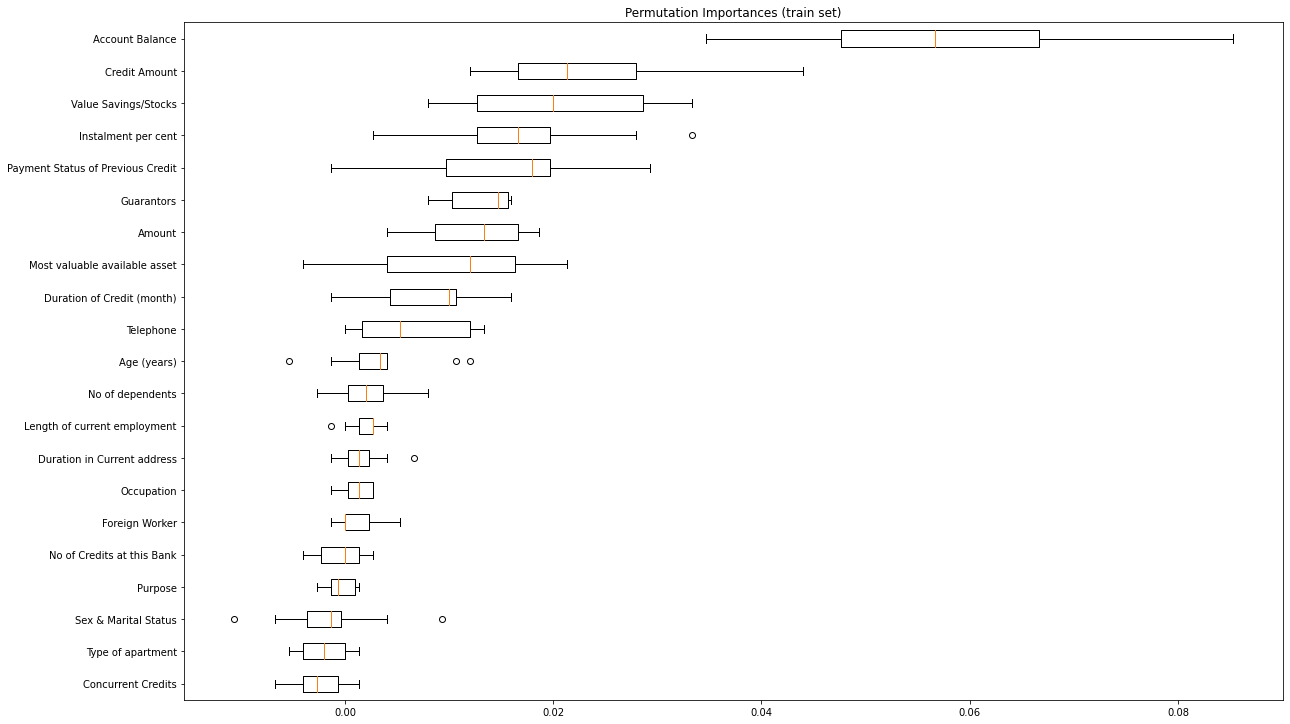

In [27]:
visualize_feature_importance(feature_importances)

As we can see, we have several features that have a very little importance.<br>
In this case, we can think to eliminate some of them and see if there is room for improvements in the results.

In [28]:
sorted_idx = feature_importances.importances_mean
sorted_idx

array([ 0.05786667,  0.008     ,  0.0156    , -0.0004    ,  0.0232    ,
        0.02066667,  0.00186667,  0.01706667, -0.00146667,  0.01306667,
        0.0016    ,  0.0104    ,  0.00333333, -0.00266667, -0.002     ,
       -0.0004    ,  0.00133333,  0.00253333,  0.0064    ,  0.00106667,
        0.0124    ])

In [29]:
soglia = feature_importances.importances_mean[18]
soglia

0.006400000000000028

In [30]:
sorted_idx = feature_importances.importances_mean <= soglia
sorted_idx

array([False, False, False,  True, False, False,  True, False,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [31]:
X2 = feature_importances.importances[sorted_idx]
X2 

array([[ 0.00133333, -0.00133333,  0.00133333,  0.        , -0.00133333,
        -0.00266667,  0.00133333, -0.00133333,  0.        , -0.00133333],
       [ 0.00133333,  0.00266667,  0.00266667,  0.00266667,  0.00266667,
         0.004     ,  0.00266667,  0.        ,  0.00133333, -0.00133333],
       [-0.00133333, -0.00266667,  0.004     , -0.00133333, -0.00666667,
        -0.01066667,  0.00933333, -0.004     ,  0.        , -0.00133333],
       [-0.00133333,  0.00133333,  0.00266667,  0.00666667,  0.004     ,
         0.00133333,  0.        ,  0.00133333,  0.00133333, -0.00133333],
       [ 0.004     ,  0.00133333,  0.01066667, -0.00533333,  0.004     ,
         0.012     ,  0.00266667,  0.004     ,  0.00133333, -0.00133333],
       [-0.004     , -0.00533333, -0.004     ,  0.        , -0.00266667,
        -0.00266667, -0.00266667, -0.00666667,  0.00133333,  0.        ],
       [ 0.00133333, -0.00266667, -0.004     ,  0.        ,  0.        ,
        -0.00533333, -0.00133333, -0.00533333

In [32]:
X3 = X_train.columns[sorted_idx]
X3

Index(['Purpose', 'Length of current employment', 'Sex & Marital Status',
       'Duration in Current address', 'Age (years)', 'Concurrent Credits',
       'Type of apartment', 'No of Credits at this Bank', 'Occupation',
       'No of dependents', 'Telephone', 'Foreign Worker'],
      dtype='object')

In [33]:
X_train_drop = X_train.drop(X3, axis = 1)
X_test_drop = X_test.drop(X3, axis = 1)

In [34]:
X_train_drop.head()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Credit Amount,Value Savings/Stocks,Instalment per cent,Guarantors,Most valuable available asset,Amount
397,4,12,2,707,1,4,1,1,0
592,1,36,4,6229,1,4,2,4,2
189,3,21,2,2923,2,1,1,3,1
443,4,15,2,1386,5,4,1,1,0
193,4,24,2,2255,5,4,1,2,0


In [35]:
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
          "penalty": ['l2']}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train_drop, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'C': 0.012742749857031334, 'penalty': 'l2', 'solver': 'newton-cg'}


In [36]:
lr_clf.fit(X_train_drop, y_train)

preds = lr_clf.predict(X_test_drop)

In [37]:
precision, recall, f_beta, support = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)

list_metrics.append(["Logistic Regression drop", accuracy, precision, recall, f_beta, auc])

print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {f_beta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.76
Precision is: 0.76
Recall is: 0.95
Fscore is: 0.94
AUC is: 0.62


In [38]:
df1 = pd.DataFrame(list_metrics,columns=['Algorithm','accuracy', 'precision', 'recall', 'f_beta', 'auc'])
df1

,Algorithm,accuracy,precision,recall,f_beta,auc
0,Logistic Regression,0.776,0.787440,0.931429,0.924924,0.672381
1,Logistic Regression drop,0.756,0.759091,0.954286,0.944940,0.623810


As we can see, we have a little improvement on recall and f_beta, but some worsening on auc, accuracy and precision. So, I decided to keep all the feature for the further analysis.

K-NEAREST NEIGHBORS

In [39]:
### BEGIN SOLUTION
max_k = 50
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1800x1200 with 0 Axes>

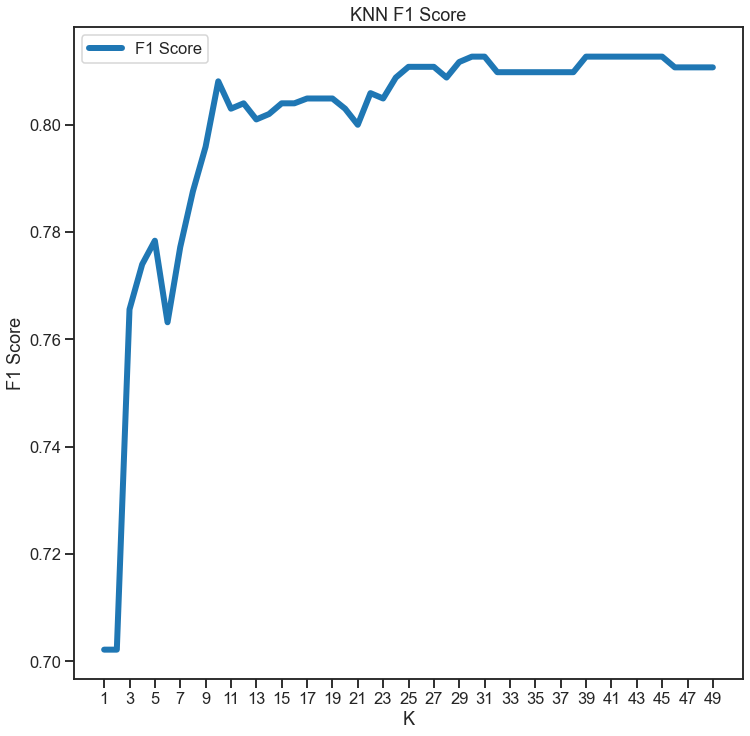

In [40]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

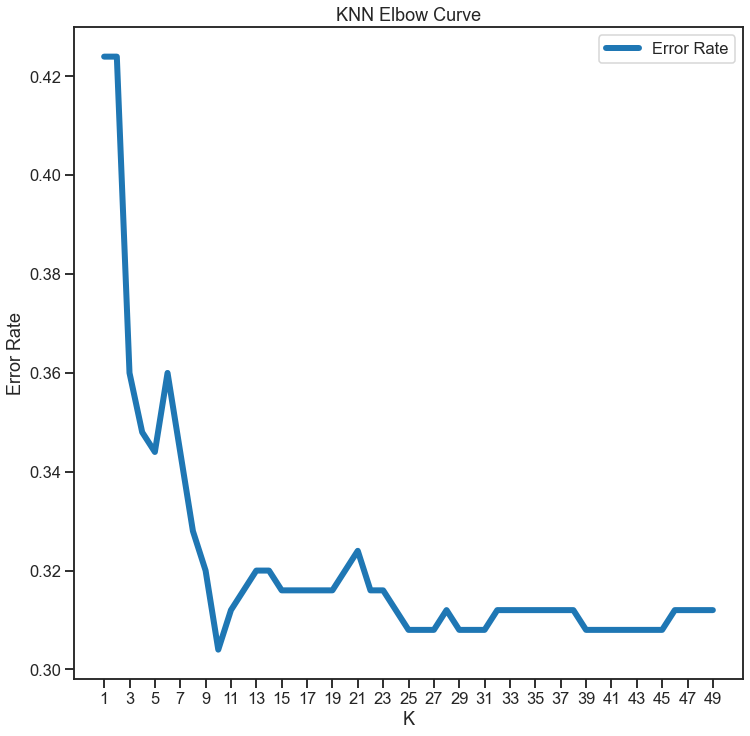

In [41]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')

K = 10 is the best parameter

In [42]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn = knn.fit(X_train, y_train)
    
y_pred = knn.predict(X_test)

In [43]:
precision, recall, f_beta, support = precision_recall_fscore_support(y_test, y_pred, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

list_metrics.append(["KNN", accuracy, precision, recall, f_beta, auc])

print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {f_beta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.70
Precision is: 0.72
Recall is: 0.91
Fscore is: 0.91
AUC is: 0.55


DECISION TREE

In [44]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best_params: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 14, 'min_samples_split': 2, 'splitter': 'best'}


In [45]:
tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

In [46]:
precision, recall, f_beta, support = precision_recall_fscore_support(y_test, y_pred, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

list_metrics.append(["Decision Tree", accuracy, precision, recall, f_beta, auc])

print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {f_beta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.75
Precision is: 0.79
Recall is: 0.87
Fscore is: 0.87
AUC is: 0.67


Printing the tree

In [47]:
from sklearn.tree import export_text
tree_exp = export_text(tree_clf, feature_names=list(X_train.columns))

As we can see the first 3 most important choises are about the account balance, the Value savings and the Duration of the Credit

In [48]:
print(tree_exp)

|--- Account Balance <= 2.50
|   |--- Value Savings/Stocks <= 2.50
|   |   |--- Duration of Credit (month) <= 22.50
|   |   |   |--- Payment Status of Previous Credit <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Payment Status of Previous Credit >  1.50
|   |   |   |   |--- Duration of Credit (month) <= 11.50
|   |   |   |   |   |--- Most valuable available asset <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Most valuable available asset >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Duration of Credit (month) >  11.50
|   |   |   |   |   |--- Credit Amount <= 1387.50
|   |   |   |   |   |   |--- Most valuable available asset <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Most valuable available asset >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Credit Amount >  1387.50
|   |   |   |   |   |   |--- Age (years) <= 30.50
|   |   |   |   |   |   |   |--- Age (years) <= 26.5

RANDOM FOREST

In [51]:
params_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=5, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters: {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [52]:
rf_cv.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [53]:
rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

In [54]:
precision, recall, f_beta, support = precision_recall_fscore_support(y_test, y_pred, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

list_metrics.append(["Random Forest", accuracy, precision, recall, f_beta, auc])

print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {f_beta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.77
Precision is: 0.76
Recall is: 0.97
Fscore is: 0.96
AUC is: 0.64


## Oversampling
One last test I would like to do is to see if there will be an improvement in performance with oversampling.

In [55]:
# Resample training data using SMOTE
smote_sampler = SMOTE(random_state = 32)

X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)

In [56]:
y_smo.value_counts()

0    525
1    525
Name: Creditability, dtype: int64

In [57]:
rf_clf.fit(X_smo, y_smo)

y_pred = rf_clf.predict(X_test)

In [58]:
precision, recall, f_beta, support = precision_recall_fscore_support(y_test, y_pred, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

list_metrics.append(["Decision Tree with Oversampling", accuracy, precision, recall, f_beta, auc])

print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {f_beta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.73
Precision is: 0.80
Recall is: 0.82
Fscore is: 0.82
AUC is: 0.67


## Conclusions

In [60]:
df2 = pd.DataFrame(list_metrics,columns=['Algorithm','Accuracy', 'Precision', 'Recall', 'FScore', 'AUC'])
df2

,Algorithm,Accuracy,Precision,Recall,FScore,AUC
0,Logistic Regression,0.776,0.787440,0.931429,0.924924,0.672381
1,Logistic Regression drop,0.756,0.759091,0.954286,0.944940,0.623810
2,KNN,0.696,0.723982,0.914286,0.905135,0.550476
3,Decision Tree,0.752,0.792746,0.874286,0.870841,0.670476
4,Random Forest,0.768,0.764706,0.965714,0.956049,0.636190
5,Decision Tree with Oversampling,0.732,0.800000,0.822857,0.821954,0.671429


As can be seen, we have very close results for each of the algorithms tested. <br>
The one that performs best, however, is the Random Forest, with good values for any of the metrics under consideration. <br><br>

Looking further, surely it would be interesting to conduct further tests with the techniques for handling unbalanced classes, tested here only summarily.


<div style="text-align: right"> Raffaele Pane </div>